# 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [7]:
Mall_data=pd.read_csv("Mall_Customers.csv")
Mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


EDA

In [27]:
Mall_data.isnull().sum()

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [23]:
Mall_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [29]:
Mall_data.shape

(200, 5)

In [39]:
Mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


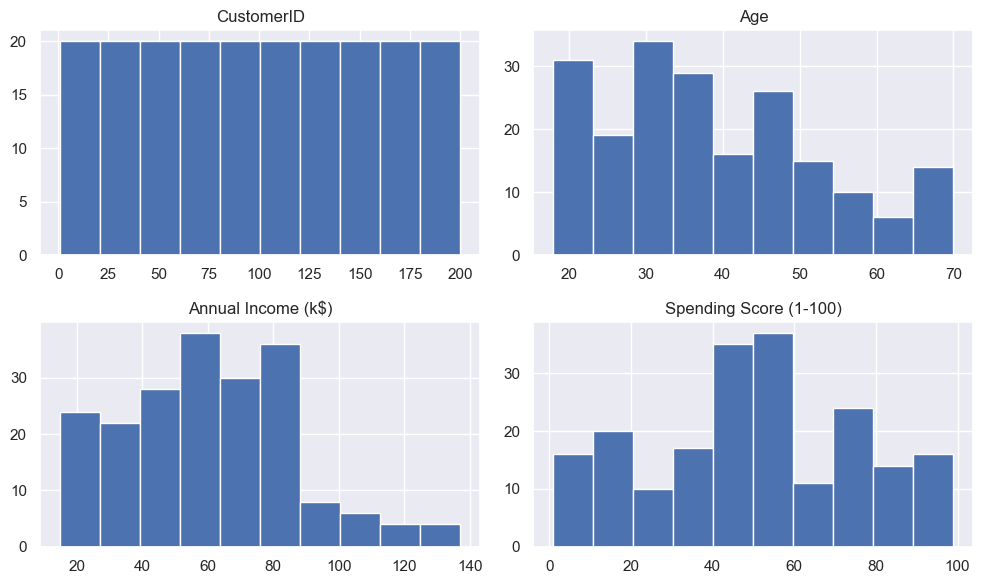

In [43]:
#The histograms reveal the distribution of numerical features, highlighting skewness and potential outliers.
Mall_data.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

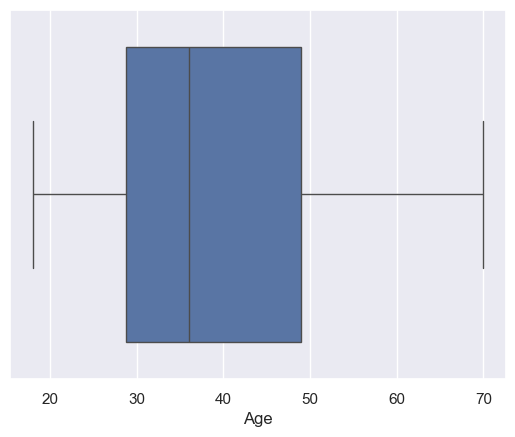

In [55]:
#search for outliers
sns.boxplot(x=Mall_data['Age'])
plt.show()


In [63]:
Mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [65]:
#Drop CustomerID Column
Mall_data.drop('CustomerID', axis =1, inplace=True)
Mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Gender
Female    112
Male       88
Name: count, dtype: int64


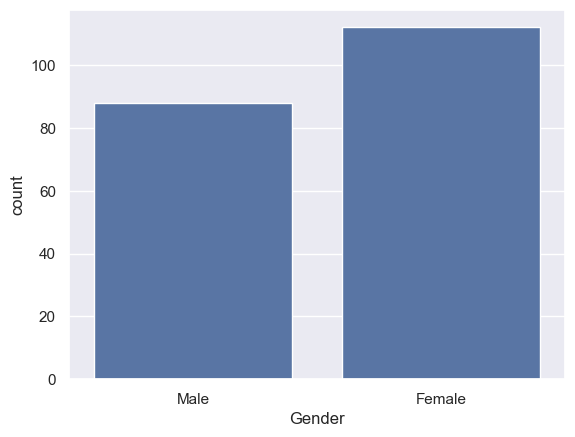

In [69]:
print( Mall_data['Gender'].value_counts())
sns.countplot(x=Mall_data['Gender'])
plt.show()


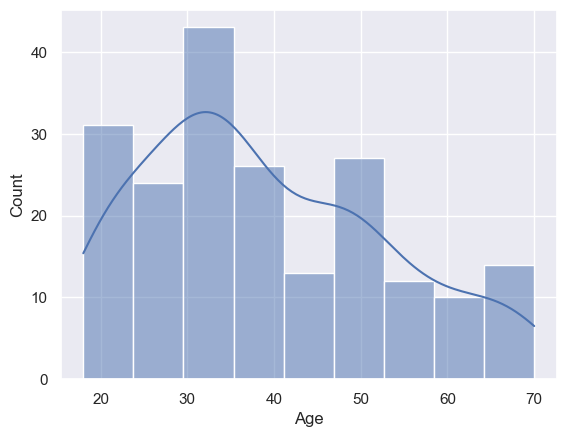

In [73]:
#Age
sns.histplot(Mall_data.Age, kde=True);

<Axes: xlabel='Income', ylabel='Count'>

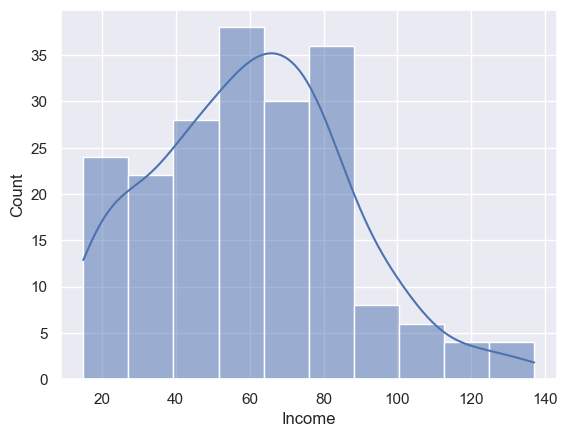

In [77]:
#Rename Annual Income Column
Mall_data.rename({'Annual Income (k$)':'Income'},axis=1,inplace=True)
sns.histplot(x=Mall_data['Income'],kde=True)

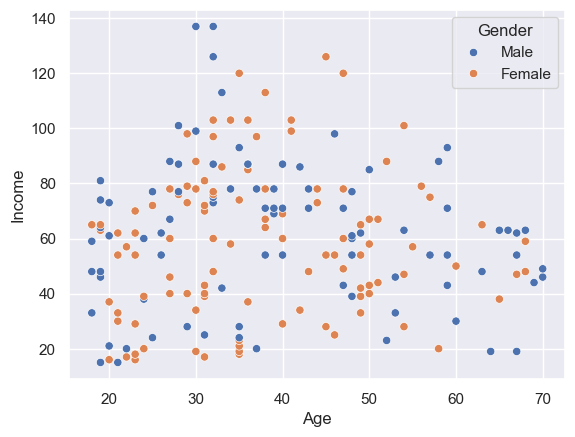

In [79]:
sns.scatterplot(y= Mall_data.Income, x= Mall_data.Age, hue= Mall_data.Gender);

In [81]:
#Rename SPending Score (1-100) into Score
Mall_data.rename({'Spending Score (1-100)':'Score'},axis=1,inplace=True)

<Axes: xlabel='Score', ylabel='Income'>

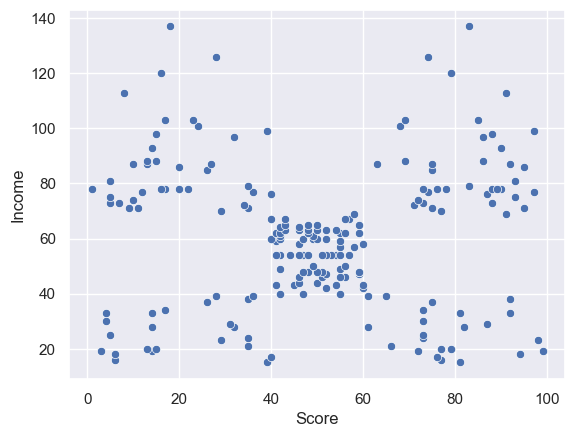

In [83]:
sns.scatterplot(y= Mall_data.Income, x= Mall_data.Score)


Considering only those two features, we can build our first

In [94]:
X=Mall_data[['Income','Score']].values

In [100]:
# Scaling
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(X)

# Clustering using K-means

In [111]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(x_scaled)



F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [113]:
Mall_data['Cluster'] = kmeans.labels_
print(Mall_data.head())

   Gender  Age  Income  Score  Cluster
0    Male   19      15     39        3
1    Male   21      15     81        4
2  Female   20      16      6        3
3  Female   23      16     77        4
4  Female   31      17     40        3


In [121]:
y_pred = kmeans.fit_predict(X_scaled)
kmeans.fit(X_scaled)

F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [123]:
(y_pred == kmeans.labels_).all()

True

In [125]:
kmeans.inertia_

65.56840815571681

In [127]:
kmeans.fit(X_scaled)
kmeans.score(X_scaled)

F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


-65.56840815571681

In [129]:
X.shape

(200, 2)

In [131]:
X[y_pred==0]

array([[39, 61],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
       [46, 46],
       [46, 56],
       [46, 55],
       [47, 52],
       [47, 59],
       [48, 51],
       [48, 59],
       [48, 50],
       [48, 48],
       [48, 59],
       [48, 47],
       [49, 55],
       [49, 42],
       [50, 49],
       [50, 56],
       [54, 47],
       [54, 54],
       [54, 53],
       [54, 48],
       [54, 52],
       [54, 42],
       [54, 51],
       [54, 55],
       [54, 41],
       [54, 44],
       [54, 57],
       [54, 46],
       [57, 58],
       [57, 55],
       [58, 60],
       [58, 46],
       [59, 55],
       [59, 41],
       [60, 49],
       [60, 40],
       [60, 42],
       [60, 52],
       [60, 47],
       [60, 50],
       [61, 42],
       [61, 49],
       [62, 41],
       [62, 48],
       [62, 59],
       [62, 55

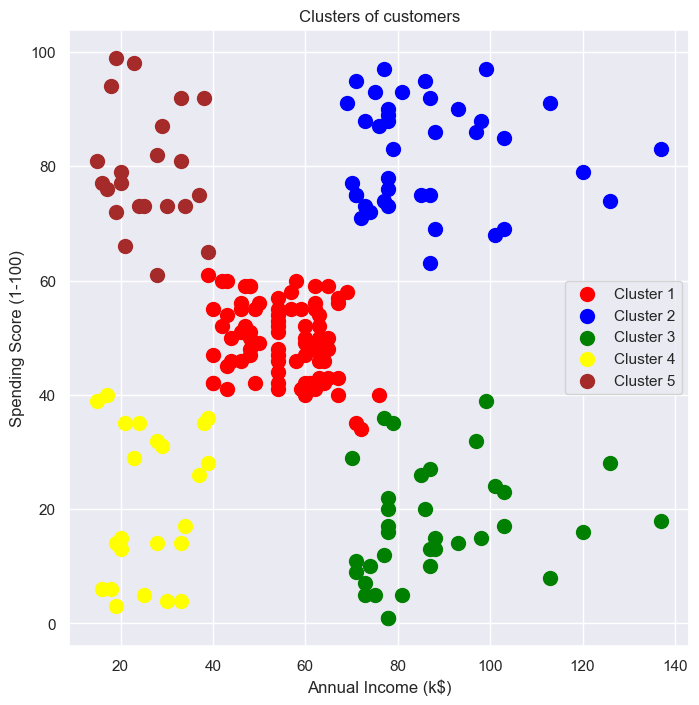

In [135]:
#Visualizing all the clusters 
plt.figure(figsize=(8,8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**We can try different number of clusters to find the optimum number of clusters using Elbow Method**

## Elbow Method

F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

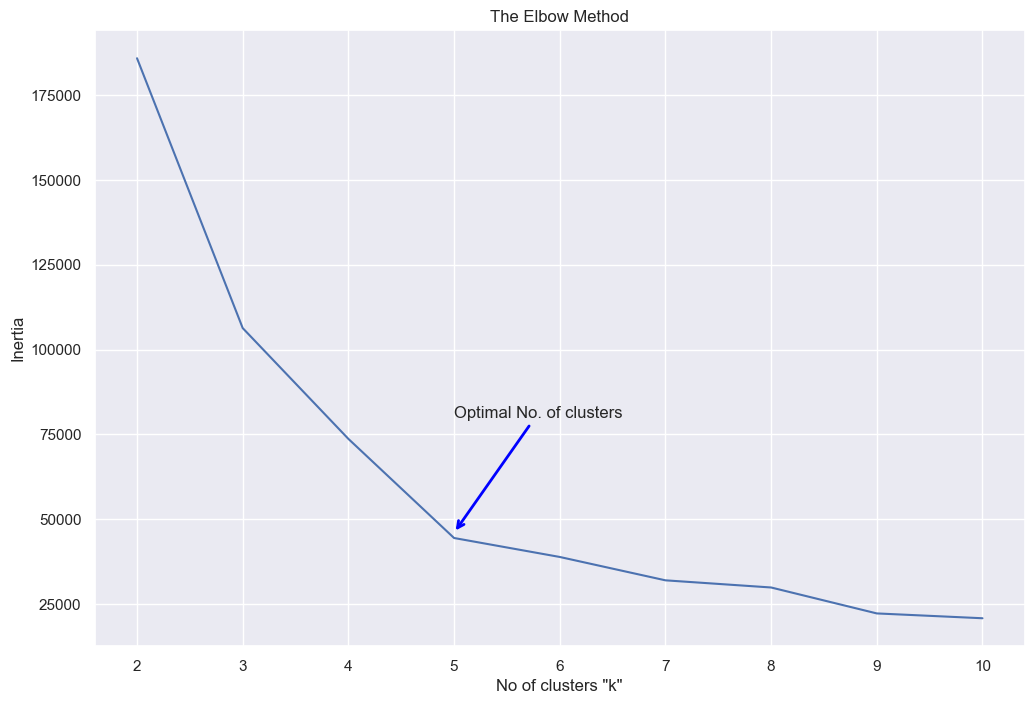

In [143]:
# Within-cluster Sum of Squares (Inertia)
inertia=[]
k_range= range(2,11)

for i in k_range:
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#Visualizing the ELBOW method to get the optimal value of K 
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=k_range, y=inertia, ax=ax)
plt.title('The Elbow Method')
plt.xlabel('No of clusters "k"')
plt.ylabel('Inertia')

# Annotate arrow
ax.annotate('Optimal No. of clusters', xy=(5, 46000), xytext=(5, 80000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()
